# 39 - Clustering: K_Means con Scikit


* En este Notebook vamos a resolver un problema de ***Clusterización usando la librería de Scikit-Learn***.


* Para resolver el problema de Clusterización vamos a utilizar la clase **"KMeans()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


* El ejemplo con el que vamos a trabajar, consiste en ***agrupar una serie de flores*** de las que sabemos ***los tamaños de su sépalo***


* El objetivo es ***encontrar 'K' Clusters que minimicen la Inercia*** (la suma de las distancias de cada elemento al centroide de su cluster):
<span></span><br><br>
<span style="font-size:20px">$$\underset{K}{argmin} \sum_{j=1}^{k}\sum_{x_i \in  c_j}\left \| x_i - \mu  \right \|^{2}$$</span>


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Visualización de los resultados](#M6)


##### Importante: En los problemas de clusterización no conocemos el dominio de salida, por lo que para el problema que se plantea no vamos a saber el tipo de flor, solo vamos a saber los tamaños de las flores.


* En primer lugar vamos a importar las librería necesarias:

<hr>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris_para_clustering.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver:
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo


In [2]:
df = pd.read_csv("./data/iris/iris_para_clustering.csv")
df[['sepal_length', 'sepal_width']].sample(5)

,sepal_length,sepal_width
6,4.6,3.4
60,5.0,2.0
4,5.0,3.6
132,6.4,2.8
103,6.3,2.9


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy
    
* Scikit necesita como entrada para el ajuste (o entrenamiento) de los modelos de Clustering los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)


In [3]:
X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo

<hr>


## <a name="M3">3. Visualización de los datos
    
* Vamos a pasar a ver la relación que hay entre el alto y ancho del sepalo de las flores, para ver si podemos apreciar de manera visual los grupo de flores que puede haber.


##### NOTA: Este es un ejercicio con finalidades didácticas y se pueden hacer estos ejercicios introspectivos. En los casos reales el clustering se hace sobre muchas más variables y no se pueden apreciar de esta manera las relaciones entre variables.


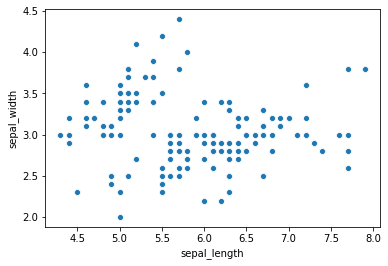

In [4]:
sns.scatterplot(x="sepal_length", y="sepal_width", data = df)

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste


In [5]:
# Creamos un objeto de la clase "KMeans()"
kmeans = KMeans(n_clusters=3, max_iter=50, init="random")

# Ajustamos el modelo
kmeans.fit(X)

KMeans(init='random', max_iter=50, n_clusters=3)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)


* Tras ajustar el modelo podemos obtener los siguientes valores:

    1. ***El valor de cada uno de los centroides***: Esto lo hacemos llamando al atributo ***"cluster_centers_"*** de la clase Kmeans.
    2. ***El valor de la inercia***: Esto lo hacemos llamando al atributo ***"inertia_"*** de la clase Kmeans.
    3. ***A que cluster pertenece cada item***:  Esto lo hacemos llamando al atributo ***"labels_"*** de la clase Kmeans.

In [6]:
# Valores de los centroides
centroides = kmeans.cluster_centers_
for index, centroide in enumerate(centroides):
    print("Cluster {}".format(index + 1))
    print("\tCentroide: {}".format(centroide))

Cluster 1
	Centroide: [5.006 3.418]
Cluster 2
	Centroide: [6.81276596 3.07446809]
Cluster 3
	Centroide: [5.77358491 2.69245283]


In [7]:
# Valor de la inercia
kmeans.inertia_

37.1237021276596

In [8]:
# Etiqueta del cluster a la que se asigna cada elemento
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

<hr>


## <a name="M6">6. Visualización de los resultados
    

* A continuación pasamos a representar en un espacio de dos dimensiones cómo agruparía nuestro modelo en ese espacio 2D y cómo asigna a cada Cluster los elementos del Dataset con el que ha entrenado:


* En primer lugar vamos a definir una malla de puntos ("meshgrid") que se utilizará para pintar las regiones de cada cluster. El objetivo de construir esta malla es la de predecir cada punto de la malla como si fuesen los datos de entrada de una flor con esos valores de alto y ancho.


* Para ello miramos los valores máximos y mínimos de los tamaños de la flor para acotar la región a pintar y posteriormente generamos el conjunto de puntos a predecir (asignar en el Cluster), llamando a la función ***"predict(X)"***

In [9]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

* Pasamos a pintar las regiones de cada Cluster así como los datos del dataset.

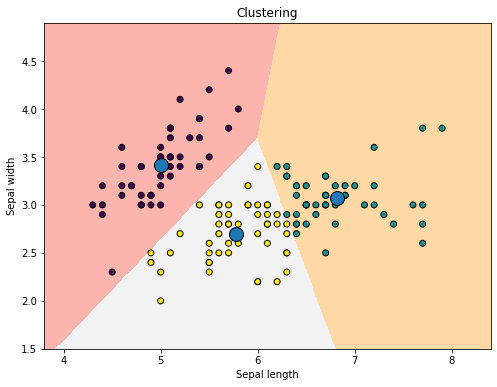

In [10]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


# Dibujamos los puntos (flores) del dataset
labels = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.viridis)

# Dibujamos los Centroides
centroides = kmeans.cluster_centers_
plt.plot(centroides[:, 0], centroides[:, 1], 'o', markeredgecolor='k', markersize=14)

plt.title('Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">